In [3]:
library(anytime)
library(lmerTest)
library(tidyverse)
library(report)
library(xtable)
library(LMERConvenienceFunctions)
library(lme4)
library(ez)
library(rstatix)
library(predictmeans)
library(effects)
library(merDeriv)
library(bayesplot)
library(report)
library(ggplot2)
library(BayesFactor)
library(tidyr)
library(lubridate)
round_df <- function(df, digits) {
  nums <- vapply(df, is.numeric, FUN.VALUE = logical(1))

  df[,nums] <- round(df[,nums], digits = digits)

  (df)
}

apatheme=theme_bw()+
  theme(panel.grid.major=element_blank(),
        panel.grid.minor=element_blank(),
        panel.border=element_blank(),
        axis.line=element_line(color="black"),
        text=element_text(size=10), #change writing size
        #legend.title=element_blank(),
       legend.position = "top")



Warning message:
"package 'rstatix' was built under R version 4.2.1"

Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter




In [4]:
dfQ <- read.csv("./Q_ada.csv")
dfQ$PId <- factor(dfQ$PId)
dfQ$BlockNumber <- factor(dfQ$BlockNumber)
#dQf$EDAMean<-scale(df$EDAMean)
dfQ$GEQ_Competence1<-as.numeric(dfQ$GEQ_Competence1)
dfQ$GEQ_Competence2<-as.numeric(dfQ$GEQ_Competence2)
dfQ$GEQ_Immersion1<-as.numeric(dfQ$GEQ_Immersion1)
dfQ$GEQ_Immersion2<-as.numeric(dfQ$GEQ_Immersion2)
dfQ$GEQ_PosAff1<-as.numeric(dfQ$GEQ_PosAff1)
dfQ$GEQ_PosAff2<-as.numeric(dfQ$GEQ_PosAff2)
dfQ$NASAMentalDemand<-as.numeric(dfQ$NASAMentalDemand)
dfQ$NASAPhysDemand<-as.numeric(dfQ$NASAPhysDemand)
dfQ$NASATempDemand<-as.numeric(dfQ$NASATempDemand)
dfQ$NASAEffort<-as.numeric(dfQ$NASAEffort)
dfQ$NASAFrustration<-as.numeric(dfQ$NASAFrustration)
dfQ$RawNASA<-as.numeric(dfQ$RawNASA)
dfQ$RawNASASum<-as.numeric(dfQ$RawNASASum)
dfQ$UX1<-as.numeric(dfQ$UX1)
dfQ$UX2<-as.numeric(dfQ$UX2)



In [5]:
head(dfQ)

,PId,BlockNumber,GEQ_Competence1,GEQ_Competence2,GEQ_Immersion1,GEQ_Immersion2,GEQ_PosAff1,GEQ_PosAff2,NASAMentalDemand,NASAPhysDemand,NASATempDemand,NASAPerformance,NASAEffort,NASAFrustration,RawNASASum,RawNASA,UX1,UX2
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,2,0,1,1,1,5,1,11,4,4,5,30,0.5000000,4,4
2,1,6,0,2,0,0,1,2,5,1,6,2,8,5,27,0.4500000,4,2
3,1,4,2,2,0,0,1,1,10,1,12,3,9,2,37,0.6166667,4,4
4,1,2,3,1,0,0,1,2,6,1,7,2,4,4,24,0.4000000,4,6
5,1,7,3,4,0,0,3,3,3,1,14,1,2,1,22,0.3666667,4,2
6,1,3,2,3,0,0,2,3,2,1,2,1,2,1,9,0.1500000,4,4


In [16]:
clnames <- c("GEQ_Competence1","GEQ_Competence2")
dfQ$GEQ_Competence <- rowMeans ( dfQ[clnames] )
clnames <- c("GEQ_Immersion1","GEQ_Immersion2")
dfQ$GEQ_Immersion <- rowMeans ( dfQ[clnames] )
clnames <- c("GEQ_PosAff1","GEQ_PosAff2")
dfQ$GEQ_PosAff <- rowMeans ( dfQ[clnames] )

dfQ
write.csv(dfQ,"./QData/Q_data_table.csv", row.names = FALSE)


PId,BlockNumber,GEQ_Competence1,GEQ_Competence2,GEQ_Immersion1,GEQ_Immersion2,GEQ_PosAff1,GEQ_PosAff2,NASAMentalDemand,NASAPhysDemand,⋯,NASAPerformance,NASAEffort,NASAFrustration,RawNASASum,RawNASA,UX1,UX2,GEQ_Competence,GEQ_Immersion,GEQ_PosAff
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,2,0,1,1,1,5,1,⋯,4,4,5,30,0.5000000,4,4,1.0,0.5,1.0
1,6,0,2,0,0,1,2,5,1,⋯,2,8,5,27,0.4500000,4,2,1.0,0.0,1.5
1,4,2,2,0,0,1,1,10,1,⋯,3,9,2,37,0.6166667,4,4,2.0,0.0,1.0
1,2,3,1,0,0,1,2,6,1,⋯,2,4,4,24,0.4000000,4,6,2.0,0.0,1.5
1,7,3,4,0,0,3,3,3,1,⋯,1,2,1,22,0.3666667,4,2,3.5,0.0,3.0
1,3,2,3,0,0,2,3,2,1,⋯,1,2,1,9,0.1500000,4,4,2.5,0.0,2.5
1,5,1,3,0,0,2,2,4,1,⋯,18,4,1,39,0.6500000,4,6,2.0,0.0,2.0
2,1,2,4,0,2,2,1,4,6,⋯,1,9,7,28,0.4666667,6,4,3.0,1.0,1.5
2,7,3,3,0,2,2,1,9,7,⋯,15,7,5,55,0.9166667,5,5,3.0,1.0,1.5


In [7]:
colnames(dfQ) 


[1] "PId"              "BlockNumber"      "GEQ_Competence1"  "GEQ_Competence2" 
 [5] "GEQ_Immersion1"   "GEQ_Immersion2"   "GEQ_PosAff1"      "GEQ_PosAff2"     
 [9] "NASAMentalDemand" "NASAPhysDemand"   "NASATempDemand"   "NASAPerformance" 
[13] "NASAEffort"       "NASAFrustration"  "RawNASASum"       "RawNASA"         
[17] "UX1"              "UX2"              "GEQ_Competence"   "GEQ_Immersion"   
[21] "GEQ_PosAff"

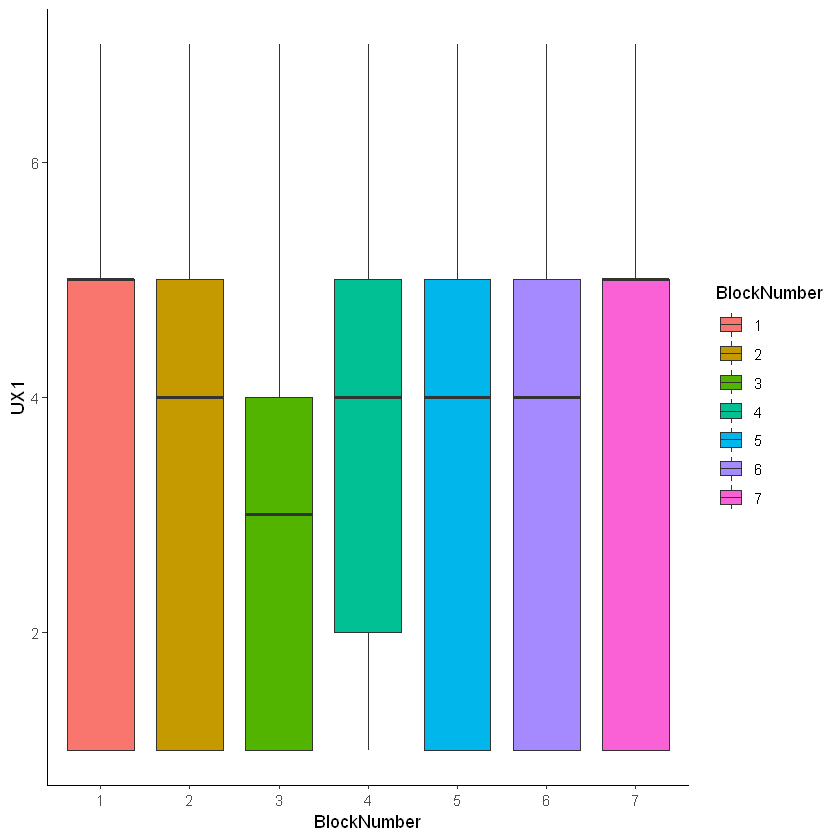

In [22]:
ggplot(dfQ, aes(x = BlockNumber, y = UX1, fill=BlockNumber)) + 
    geom_boxplot()+theme_classic()#+ 
    #facet_wrap(~NBackN)

In [42]:
shapiro.test(dfQ$UX1)
#friedman.test(y=dfQ$RawNASASum, groups=dfQ$BlockNumber, blocks=dfQ$PID)

friedman.test(y = dfQ$RawNASASum, groups = FALSE, blocks = dfQ$BlockNumber)


summary(aov(UX2 ~ BlockNumber + Error(PId/BlockNumber), data = dfQ))
summary


	Shapiro-Wilk normality test

data:  dfQ$UX1
W = 0.87233, p-value = 1.063e-08


ERROR: Error in friedman.test.default(y = dfQ$RawNASASum, groups = FALSE, blocks = dfQ$BlockNumber): 'y', 'groups' and 'blocks' must have the same length


In [26]:
dfQ %>% friedman_effsize(UX2 ~ BlockNumber | PId)

,.y.,n,effsize,method,magnitude
,<chr>,<int>,<dbl>,<chr>,<ord>
1,UX2,17,0.06855456,Kendall W,small


In [45]:
shapiro.test(dfQ$RawNASASum)
mes <- "RawNASASum"
x <- (dfQ%>%filter(BlockNumber==6))[[mes]] 
y <- (dfQ%>%filter(BlockNumber==7))[[mes]]

wilcox.test(x, y, paired=TRUE)



	Shapiro-Wilk normality test

data:  dfQ$RawNASASum
W = 0.95903, p-value = 0.001122


Warning message in wilcox.test.default(x, y, paired = TRUE):
"cannot compute exact p-value with ties"



	Wilcoxon signed rank test with continuity correction

data:  x and y
V = 30.5, p-value = 0.03115
alternative hypothesis: true location shift is not equal to 0


In [27]:
colnames(dfQ)

[1] "PId"              "BlockNumber"      "GEQ_Competence1"  "GEQ_Competence2" 
 [5] "GEQ_Immersion1"   "GEQ_Immersion2"   "GEQ_PosAff1"      "GEQ_PosAff2"     
 [9] "NASAMentalDemand" "NASAPhysDemand"   "NASATempDemand"   "NASAPerformance" 
[13] "NASAEffort"       "NASAFrustration"  "RawNASASum"       "RawNASA"         
[17] "UX1"              "UX2"              "GEQ_Competence"   "GEQ_Immersion"   
[21] "GEQ_PosAff"